Import the necessary libraries and the dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

filename="C:\ML\Pokemon.csv"
df=pd.read_csv(filename)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Convert target column from categorical to numerical type

In [22]:
df["Legendary"] = df["Legendary"].astype(int)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


Plotting a bar graph to identify the classification of Legendary Pokemon according to total stats

C:\Users\aksha\AppData\Local\Temp\ipykernel_12256\3329541336.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Legendary", y="Total", ci=None)


<Axes: xlabel='Legendary', ylabel='Total'>

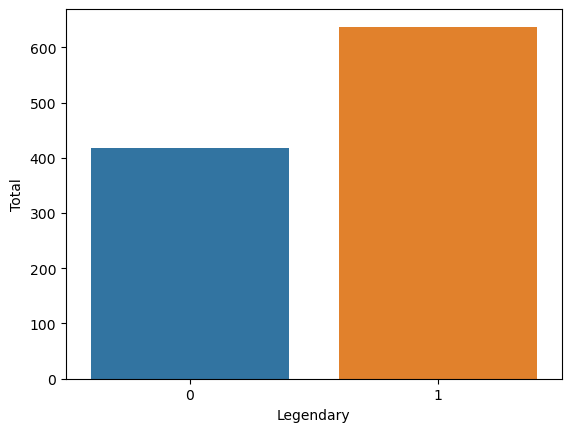

In [23]:
sns.barplot(data=data, x="Legendary", y="Total", ci=None)

This tells us that total stats above or equal to 600 is considered a Legendary Pokemon

Drop the categorical columns for classification and split the data into training and testing sets.

In [24]:
df=df.drop(['Name'],axis=1)
df=df.drop(['Type 1'],axis=1)
df=df.drop(['Type 2'],axis=1)
X=df.drop('Legendary',axis=1).values
y=df['Legendary'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21, stratify=y)

Setup a knn classifier with k neighbors=1 and fit the KNN model

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Get the accuracy of the model

In [26]:
knn.score(X_test,y_test)

0.96875

As the dataset is cleaned and the values are not susceptible to much error, the model gives an accuracy of 96%

Get the predictions using the classifier we had fit above

In [27]:
y_pred = knn.predict(X_test)

Obtaining the confusion matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[288,   6],
       [  4,  22]], dtype=int64)

In [29]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted Fail','Predicted Pass'],index=['Actual Fail','Actual Pass'])

,Predicted Fail,Predicted Pass
Actual Fail,288,6
Actual Pass,4,22


This tells us that 6 false positives and 4 false negatives predictions were made.

Obtain Classification Report

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       294
           1       0.79      0.85      0.81        26

    accuracy                           0.97       320
   macro avg       0.89      0.91      0.90       320
weighted avg       0.97      0.97      0.97       320



The classfication is highly accurate when predicting non-legendary and less acccurate when predicting legendary pokemon as some pokemon have the stat requirements for legendary pokemon but are not legendary. These could be the Mega pokemon or the pseudo-legendary pokemon.

Using elbow method to find best K value, this stores the error rate for each K value in an array

In [31]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting the graph for best fitting K value between 1 to 40

Text(0, 0.5, 'Error Rate')

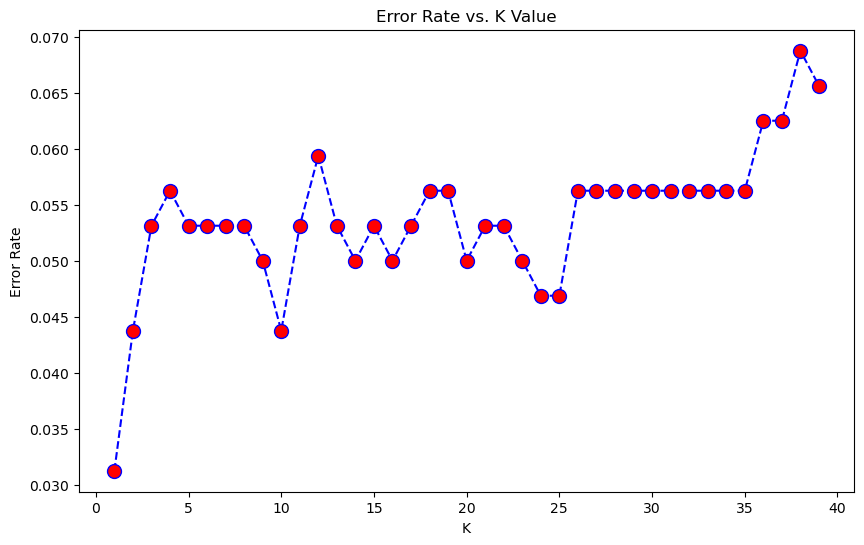

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

This tells us that the K value 1 is the best to get the least error rate.